In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def prep_data(path, train_percent):

    to_normalize = ['neighbours_1', 'neighbours_2', 'common_neigbhours', 'total_neigbhours',
                     'prefferential_attachment', 'friends_measure', 'shortest_path']
    
    data = pd.read_csv(path)
    
    for col in to_normalize:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    
    data = data.drop(['node_1', 'node_2'], axis = 'columns')
    label = data['link_exists']
    train_data = data.drop(['link_exists'], axis = 'columns')
    x_train, x_test, y_train, y_test = train_test_split(train_data, label, test_size=1-train_percent, random_state=42)
    return x_train, y_train, x_test, y_test


In [3]:
model_performance_data = pd.DataFrame(columns=['Dataset' ,'Model', 'Percentage of data in training', 'Train Accuracy','Test Accuracy'])

In [4]:
def train_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    acc_score_train = accuracy_score(y_train, model.predict(x_train))
    acc_score_test = accuracy_score(y_test, model.predict(x_test))
    return acc_score_train, acc_score_test

In [5]:
def model_performance(dataset, model, name, x_train, y_train, x_test, y_test, percentage_of_data_in_training):
    accuracy_score_train, accuracy_score_test = train_model(model, x_train, y_train, x_test, y_test)
    model_performance_data.loc[len(model_performance_data.index)] = [dataset, name, percentage_of_data_in_training,
                                                                      accuracy_score_train, accuracy_score_test]

In [6]:
data = ['data/CondMat.csv', 'data/GenRel.csv', 'data/ErdosReny.csv', 'data/BarabasiAlbert.csv']

percentages = [0.1, 0.3, 0.5, 0.7, 0.9]

for dataset in data:
    for percent in percentages:
        x_train, y_train, x_test, y_test = prep_data(dataset, percent)
        model = GaussianNB()
        model_performance(dataset, model, 'GaussianNB', x_train, y_train, x_test, y_test, percent)
        model = DecisionTreeClassifier(criterion='entropy')
        model_performance(dataset, model, 'DecisionTreeClassifier', x_train, y_train, x_test, y_test, percent)
        model = KNeighborsClassifier()
        model_performance(dataset, model, 'KNeigborsClassifier', x_train, y_train, x_test, y_test, percent)
        model = AdaBoostClassifier(algorithm='SAMME')
        model_performance(dataset, model, 'AdaBoostClassifier', x_train, y_train, x_test, y_test, percent)
        model = BaggingClassifier()
        model_performance(dataset, model, 'BaggingClassifier', x_train, y_train, x_test, y_test, percent)

model_performance_data.to_csv('model_performance.csv', index=False)

In [ ]:
model_perf = pd.read_csv('model_performance.csv')

grouped = model_perf.groupby('Dataset')

frames = {category : group for category, group in grouped}
df_CondMat = frames['data/CondMat.csv']
df_GenRel = frames['data/GenRel.csv']
df_ErdosReny = frames['data/ErdosReny.csv']
df_BarabasiAlbert = frames['data/BarabasiAlbert.csv']

Text(0.5, 0.98, 'Comparison of Test and Train Accuracies Across Different Models and Datasets')

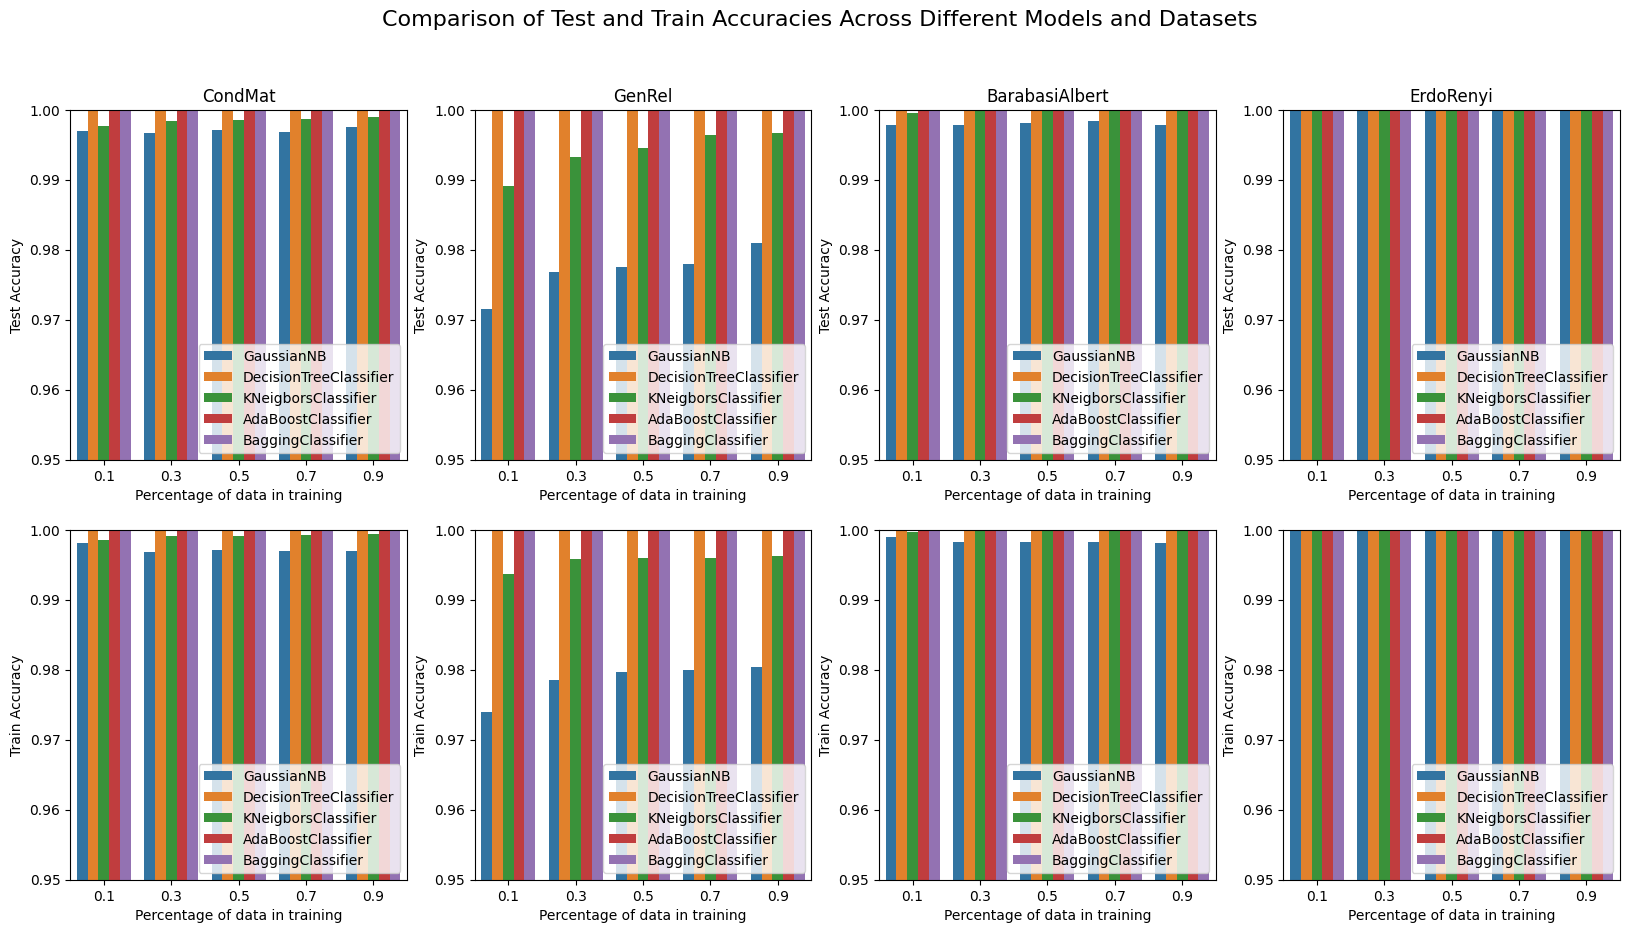

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
sns.barplot(data=df_CondMat, x='Percentage of data in training', y='Test Accuracy', hue='Model', ax=axes[0][0])
sns.barplot(data=df_GenRel, x='Percentage of data in training', y='Test Accuracy', hue='Model', ax=axes[0][1])
sns.barplot(data=df_BarabasiAlbert, x='Percentage of data in training', y='Test Accuracy', hue='Model', ax=axes[0][2])
sns.barplot(data=df_ErdosReny, x='Percentage of data in training', y='Test Accuracy', hue='Model', ax=axes[0][3])
axes[0][0].set_ylim(0.95, 1)
axes[0][1].set_ylim(0.95, 1)
axes[0][2].set_ylim(0.95, 1)
axes[0][3].set_ylim(0.95, 1)
axes[0][0].set_title('CondMat')
axes[0][1].set_title('GenRel')
axes[0][2].set_title('BarabasiAlbert')
axes[0][3].set_title('ErdoRenyi')
axes[0][0].legend(loc='lower right')
axes[0][1].legend(loc='lower right')
axes[0][2].legend(loc='lower right')
axes[0][3].legend(loc='lower right')
sns.barplot(data=df_CondMat, x='Percentage of data in training', y='Train Accuracy', hue='Model', ax=axes[1][0])
sns.barplot(data=df_GenRel, x='Percentage of data in training', y='Train Accuracy', hue='Model', ax=axes[1][1])
sns.barplot(data=df_BarabasiAlbert, x='Percentage of data in training', y='Train Accuracy', hue='Model', ax=axes[1][2])
sns.barplot(data=df_ErdosReny, x='Percentage of data in training', y='Train Accuracy', hue='Model', ax=axes[1][3])
axes[1][0].set_ylim(0.95, 1)
axes[1][1].set_ylim(0.95, 1)
axes[1][2].set_ylim(0.95, 1)
axes[1][3].set_ylim(0.95, 1)
axes[1][0].legend(loc='lower right')
axes[1][1].legend(loc='lower right')
axes[1][2].legend(loc='lower right')
axes[1][3].legend(loc='lower right')
fig.suptitle('Comparison of Test and Train Accuracies Across Different Models and Datasets', fontsize=16)
#
